In [28]:
import pandas as pd
import numpy as np
import os
import sys
import sklearn
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

User uploaded file "ACC_AUX.csv" with length 3201698 bytes

User uploaded file "ACCIDENT.csv" with length 5398194 bytes

User uploaded file "CEVENT.csv" with length 2625888 bytes

User uploaded file "DAMAGE.csv" with length 3063538 bytes

User uploaded file "DISTRACT.csv" with length 792596 bytes

User uploaded file "DRIMPAIR.csv" with length 780534 bytes

User uploaded file "DRUGS.csv" with length 1883861 bytes

User uploaded file "FACTOR.csv" with length 765741 bytes

User uploaded file "MANEUVER.csv" with length 795168 bytes

User uploaded file "MIACC.csv" with length 1041740 bytes

User uploaded file "MIDRVACC.csv" with length 1021371 bytes

User uploaded file "MIPER.csv" with length 1998730 bytes

User uploaded file "NMCRASH.csv" with length 180454 bytes

User uploaded file "NMIMPAIR.csv" with length 134464 bytes

User uploaded file "NMPRIOR.csv" with length 135301 bytes

User uploaded file "PARKWORK.csv" with length 267236 bytes

User uploaded file "PBTYPE.csv" with length 462439 bytes

User uploaded file "PER_AUX.csv" with length 4792170 bytes

User uploaded file "PERSON.csv" with length 13256237 bytes

User uploaded file "SAFETYEQ.csv" with length 207131 bytes

User uploaded file "VEH_AUX.csv" with length 2324544 bytes

User uploaded file "VEHICLE.csv" with length 16363292 bytes

User uploaded file "VEVENT.csv" with length 3567752 bytes

User uploaded file "VINDECODE.csv" with length 24128934 bytes

User uploaded file "VIOLATN.csv" with length 811167 bytes

User uploaded file "VISION.csv" with length 761725 bytes

User uploaded file "VSOE.csv" with length 2317084 bytes

In [2]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [3]:
# df = pd.read_csv("PERSON.csv") # For on Colab
df = pd.read_csv("FARS2018NationalCSV\\PERSON.csv") # For local jupyter

In [4]:
df

,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,MONTH,HOUR,...,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
0,1,10001,1,1,1,0,121,5,1,6,...,600,0,0,0,0,0,1,7,2,0
1,1,10002,1,1,1,0,127,8,1,0,...,48,0,0,0,0,0,0,7,2,0
2,1,10002,1,1,2,0,127,8,1,0,...,48,0,0,0,0,0,0,7,2,0
3,1,10003,2,1,1,0,21,8,1,22,...,2250,0,0,0,0,0,0,7,1,0
4,1,10003,2,2,1,0,21,8,1,22,...,8888,999,99,0,0,0,8,0,0,0
5,1,10004,1,1,1,0,3,9,1,13,...,8888,999,99,0,0,0,8,0,0,0
6,1,10004,1,1,2,0,3,9,1,13,...,1302,0,0,0,0,0,0,7,1,0
7,1,10005,2,1,1,0,73,19,1,7,...,709,0,0,0,0,0,1,7,1,0
8,1,10005,2,2,1,0,73,19,1,7,...,8888,999,99,0,0,0,8,0,0,0
9,1,10006,1,0,1,1,49,19,1,22,...,2208,0,0,0,0,0,0,7,1,20


In [5]:
df2 = df[['RUR_URB','FUNC_SYS','HARM_EV','MAN_COLL','BODY_TYP','MOD_YEAR','ROLLOVER','IMPACT1','FIRE_EXP','AGE','SEX','SEAT_POS','REST_USE','AIR_BAG','EJECTION','EXTRICAT','INJ_SEV']]
df2.columns = [x.lower() for x in df2.columns]
df2 = df2.rename(columns = {'func_sys':'road_type',
                            'harm_ev':'harm_event',
                            'man_coll':'car_orientation',
                            'body_typ':'body_type',
                            'mod_year':'model_year',
                            'impact1':'impact_area',
                            'fire_exp':'fire',
                            'rest_use':'protection',
                            'air_bag':'airbag',
                            'extricat':'extricated'})
# df2 = df2[df2['hour'] < 24]
df2 = df2[df2['rur_urb'] < 3]
df2 = df2[df2['road_type'] < 8]
df2 = df2[df2['harm_event'] < 99]
df2 = df2[df2['car_orientation'] < 11]
df2 = df2[df2['body_type'] < 91]
df2 = df2[df2['model_year'] < 9998]
df2 = df2[df2['impact_area'] < 98]
df2 = df2[df2['age'] < 998]
df2 = df2[df2['sex'] < 8]
df2 = df2[df2['seat_pos'] < 98]
df2 = df2[df2['protection'] < 29]
df2 = df2[df2['airbag'] < 98]
df2 = df2[(df2['ejection'] != 9) & (df2['ejection'] != 7)]
df2 = df2[df2['extricated'] < 9]
df2 = df2[df2['inj_sev'] < 5]
df2['inj_sev'] = df2['inj_sev'].map({0:0,1:0,2:1,3:2,4:2})
# df2['age'] = df2['age'].map({x:0 if x < 18 else 1 if x < 65 else 2 for x in range(df2['age'].max() + 1)})
# df2['hour'] = df2['hour'].map({x:0 if x > 4 and x < 20 else 1 for x in range(df2['hour'].max() + 1)})
df2 = df2.astype('int64')
df2 = df2.reset_index(drop = True)

In [6]:
df2.isnull().sum()

rur_urb            0
road_type          0
harm_event         0
car_orientation    0
body_type          0
model_year         0
rollover           0
impact_area        0
fire               0
age                0
sex                0
seat_pos           0
protection         0
airbag             0
ejection           0
extricated         0
inj_sev            0
dtype: int64

In [7]:
df2.columns

Index(['rur_urb', 'road_type', 'harm_event', 'car_orientation', 'body_type',
       'model_year', 'rollover', 'impact_area', 'fire', 'age', 'sex',
       'seat_pos', 'protection', 'airbag', 'ejection', 'extricated',
       'inj_sev'],
      dtype='object')

In [8]:
df2['inj_sev'].value_counts().sort_index()

0    23207
1     7570
2    29332
Name: inj_sev, dtype: int64

In [9]:
dummy_df = pd.get_dummies(df2, columns=['rur_urb','road_type','harm_event','car_orientation','body_type','rollover','impact_area','seat_pos','protection','airbag', 'ejection'], drop_first=True)

In [10]:
dummy_df

,model_year,fire,age,sex,extricated,inj_sev,rur_urb_2,road_type_2,road_type_3,road_type_4,...,airbag_2,airbag_3,airbag_7,airbag_8,airbag_9,airbag_20,ejection_1,ejection_2,ejection_3,ejection_8
0,2018,0,55,1,0,2,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2001,0,36,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2004,0,58,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2004,0,26,2,0,2,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,2016,0,46,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,2011,0,23,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,2004,0,42,2,0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,2004,0,6,1,0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,2004,0,5,1,0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,2014,0,73,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
Xcols = dummy_df.columns.tolist()
Xcolstot = df2.columns.tolist()

In [12]:
Xcols.remove('inj_sev')
Xcolstot.remove('inj_sev')

In [13]:
Xtot = df2[Xcolstot].values
ytot = df2['inj_sev'].values

X = dummy_df[Xcols].values
y = dummy_df['inj_sev'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .2, stratify=y, random_state = 50)

In [ ]:
pca = PCA(n_components=50)
pca.fit_transform(Xtrain)
feature_pca = pca.transform(Xtrain)

In [ ]:
feature_pca

In [ ]:
model = LinearSVC(C = .1, verbose=99)
# pipe_steps = [('pca',PCA(n_components=10)), ('linearsvc',LinearSVC())]

# check_params = {
#     'pca__n_components': [8,10,12],
#     'linearsvc__C': [.1, .5, 1, 10, 20, 30, 40, 50, 75, 100, 500, 1000]
# }
# pipeline = Pipeline(pipe_steps)
scores = sklearn.model_selection.cross_val_score(model, feature_pca, ytrain, cv=5, verbose = 99, scoring='f1_micro', n_jobs=-1)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
# create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=5, scoring = 'accuracy')
# create_grid.fit(Xtrain, ytrain)
# print(create_grid.score(Xtest, ytest))
# print(create_grid.best_params_)

.5,10 = .57 +- .01

.5,15 = .58 +- .01

.5,30 = .60 +- .02

.1,30 = .61 +- .00

.1,20 = .60 +- .01

.1,50 = .62 +- .00

.1,None = .63 +- .01

.5,20 = .65 +- .02




.1,50 = .70 +- .01

.1,None .71 +- .00

.5,50 .71 .02


In [ ]:
import statsmodels.api as sm

model = sm.GLM(dummy_df['inj_sev'].values, dummy_df[[x for x in dummy_df.columns if x != 'inj_sev']].values, axis = 1, family=sm.families.Binomial())

results = model.fit()

print(results.summary())

In [ ]:
type(results.summary())

In [14]:
from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest
discrete_feat_idx = [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15] # an array with indices of discrete features
score_func = partial(mutual_info_classif, discrete_features=discrete_feat_idx)
tot_scores = []
for a in range(7, 14):
    s = SelectKBest(score_func, k=a)
    s.fit_transform(Xtot, ytot)

    cols = s.get_support(indices=True)
    cols

    Xsel = df2.iloc[:, cols]
    # Xsel = Xtot[:, cols]

    cat_vars = ['rur_urb','road_type','harm_event','car_orientation','body_type','rollover','impact_area','seat_pos','protection','airbag', 'ejection']

    Xsel = pd.get_dummies(Xsel, columns=[x for x in Xsel.columns if x in cat_vars], drop_first=True)
    Xsel = Xsel.values
    print(Xsel.shape)
    print(cols)

    model = LinearSVC(C = .1, verbose=1)
    
    pca = PCA(n_components=None)
    pca.fit_transform(Xsel)
    Xsel = pca.transform(Xsel)
    
    scoring = {'acc': 'accuracy',
               'prec_macro': 'precision_macro',
               'rec_macro': 'recall_macro',
                'f1_macro': 'f1_macro'}
    
    scores = sklearn.model_selection.cross_validate(model, Xsel, ytot, cv=5, verbose = 1, scoring=scoring, n_jobs=-1)
    print("k = %i:  Accuracy: %0.2f (+/- %0.2f)" % (a, scores['test_acc'].mean(), scores['test_acc'].std() * 2))
    print("k = %i: Precision: %0.2f (+/- %0.2f)" % (a, scores['test_prec_macro'].mean(), scores['test_prec_macro'].std() * 2))
    print("k = %i:    Recall: %0.2f (+/- %0.2f)" % (a, scores['test_rec_macro'].mean(), scores['test_rec_macro'].std() * 2))
    print("k = %i:        F1: %0.2f (+/- %0.2f)" % (a, scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))

(60109, 134)
[ 2  4  6 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


k = 7:  Accuracy: 0.73 (+/- 0.03)
k = 7: Precision: 0.58 (+/- 0.10)
k = 7:    Recall: 0.56 (+/- 0.02)
k = 7:        F1: 0.52 (+/- 0.02)
(60109, 157)
[ 2  4  6  7 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished


k = 8:  Accuracy: 0.73 (+/- 0.03)
k = 8: Precision: 0.61 (+/- 0.11)
k = 8:    Recall: 0.56 (+/- 0.01)
k = 8:        F1: 0.52 (+/- 0.02)
(60109, 158)
[ 2  4  6  7  9 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.0min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished


k = 9:  Accuracy: 0.74 (+/- 0.02)
k = 9: Precision: 0.62 (+/- 0.07)
k = 9:    Recall: 0.57 (+/- 0.01)
k = 9:        F1: 0.53 (+/- 0.01)
(60109, 165)
[ 2  3  4  6  7  9 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.1min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished


k = 10:  Accuracy: 0.75 (+/- 0.02)
k = 10: Precision: 0.62 (+/- 0.06)
k = 10:    Recall: 0.57 (+/- 0.01)
k = 10:        F1: 0.54 (+/- 0.01)
(60109, 166)
[ 0  2  3  4  6  7  9 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


k = 11:  Accuracy: 0.75 (+/- 0.02)
k = 11: Precision: 0.63 (+/- 0.05)
k = 11:    Recall: 0.57 (+/- 0.01)
k = 11:        F1: 0.54 (+/- 0.01)
(60109, 167)
[ 0  2  3  4  5  6  7  9 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


k = 12:  Accuracy: 0.75 (+/- 0.02)
k = 12: Precision: 0.62 (+/- 0.05)
k = 12:    Recall: 0.57 (+/- 0.01)
k = 12:        F1: 0.54 (+/- 0.01)
(60109, 190)
[ 0  2  3  4  5  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.4min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


k = 13:  Accuracy: 0.75 (+/- 0.02)
k = 13: Precision: 0.63 (+/- 0.04)
k = 13:    Recall: 0.57 (+/- 0.01)
k = 13:        F1: 0.54 (+/- 0.01)


In [33]:
for i in range(len(tot_scores)):
    print("k = %i: Accuracy: %0.2f (+/- %0.2f)" % (i + 7, tot_scores[i].mean(), tot_scores[i].std() * 2))

k = 7: Accuracy: 0.69 (+/- 0.04)
k = 8: Accuracy: 0.69 (+/- 0.05)
k = 9: Accuracy: 0.69 (+/- 0.05)
k = 10: Accuracy: 0.70 (+/- 0.04)
k = 11: Accuracy: 0.71 (+/- 0.04)
k = 12: Accuracy: 0.71 (+/- 0.04)
k = 13: Accuracy: 0.71 (+/- 0.04)


In [ ]:
for i in range(len(tot_scores)):
    print("k = %i: Accuracy: %0.2f (+/- %0.2f)" % (i + 7, tot_scores[i].mean(), tot_scores[i].std() * 2))

In [19]:
tot_scores = []
discrete_feat_idx = [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15] # an array with indices of discrete features
score_func = partial(mutual_info_classif, discrete_features=discrete_feat_idx)
s = SelectKBest(score_func, k=10)
s.fit_transform(Xtot, ytot)

cols = s.get_support(indices=True)
cols

Xsel = df2.iloc[:, cols].copy()
# Xsel = Xtot[:, cols]

cat_vars = ['rur_urb','road_type','harm_event','car_orientation','body_type','rollover','impact_area','seat_pos','protection','airbag', 'ejection']

Xsel = pd.get_dummies(Xsel, columns=[x for x in Xsel.columns if x in cat_vars], drop_first=True)
Xsel = Xsel.values
Xsel.shape

model = LinearSVC(C = .1, verbose=1)

pca = PCA(n_components=30)
pca.fit_transform(Xsel)
feature_pca = pca.transform(Xsel)

scoring = {'acc': 'accuracy',
               'prec_macro': 'precision_macro',
               'rec_macro': 'recall_macro',
                'f1_macro': 'f1_macro'}

scores = sklearn.model_selection.cross_validate(model, Xsel, ytot, cv=5, verbose = 1, scoring=scoring, n_jobs=-1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   31.1s remaining:   46.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.9s finished


{'fit_time': array([29.68183947, 30.39913321, 29.67585301, 29.0784514 , 30.44197965]), 'score_time': array([0.05984044, 0.04986405, 0.06183672, 0.06183386, 0.05485511]), 'test_acc': array([0.73384347, 0.75338934, 0.75259962, 0.75908826, 0.72656185]), 'train_acc': array([0.75608285, 0.75398245, 0.75320246, 0.74540426, 0.75952421]), 'test_prec_macro': array([0.67117596, 0.57482393, 0.60126026, 0.64171421, 0.59689874]), 'train_prec_macro': array([0.70311159, 0.7077599 , 0.69536231, 0.6665133 , 0.70214274]), 'test_rec_macro': array([0.56560703, 0.57663061, 0.57166054, 0.58074419, 0.55935235]), 'train_rec_macro': array([0.58168731, 0.58149729, 0.57742078, 0.5770074 , 0.58602432]), 'test_f1_macro': array([0.527459  , 0.53830211, 0.54128974, 0.54540664, 0.52286816]), 'train_f1_macro': array([0.5507315 , 0.55276513, 0.54796446, 0.54479881, 0.55641812])}


In [21]:
list(scores.keys())

['fit_time',
 'score_time',
 'test_acc',
 'train_acc',
 'test_prec_macro',
 'train_prec_macro',
 'test_rec_macro',
 'train_rec_macro',
 'test_f1_macro',
 'train_f1_macro']

In [ ]:
for i in range(len(tot_scores)):
    print("k = %i: Accuracy: %0.2f (+/- %0.2f)" % (i + 7, tot_scores[i].mean(), tot_scores[i].std() * 2))

In [ ]:
cols

In [ ]:
Xsel.shape

In [5]:
from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest
def cool_func(df, mappings, startk, endk, n_comp = None):
    df2 = df[['RUR_URB','FUNC_SYS','HARM_EV','MAN_COLL','BODY_TYP','MOD_YEAR','ROLLOVER','IMPACT1','FIRE_EXP','AGE','SEX','SEAT_POS','REST_USE','AIR_BAG','EJECTION','EXTRICAT','INJ_SEV']]
    df2.columns = [x.lower() for x in df2.columns]
    df2 = df2.rename(columns = {'func_sys':'road_type',
                                'harm_ev':'harm_event',
                                'man_coll':'car_orientation',
                                'body_typ':'body_type',
                                'mod_year':'model_year',
                                'impact1':'impact_area',
                                'fire_exp':'fire',
                                'rest_use':'protection',
                                'air_bag':'airbag',
                                'extricat':'extricated'})
    # df2 = df2[df2['hour'] < 24]
    df2 = df2[df2['rur_urb'] < 3]
    df2 = df2[df2['road_type'] < 8]
    df2 = df2[df2['harm_event'] < 99]
    df2 = df2[df2['car_orientation'] < 11]
    df2 = df2[df2['body_type'] < 91]
    df2 = df2[df2['model_year'] < 9998]
    df2 = df2[df2['impact_area'] < 98]
    df2 = df2[df2['age'] < 998]
    df2 = df2[df2['sex'] < 8]
    df2 = df2[df2['seat_pos'] < 98]
    df2 = df2[df2['protection'] < 29]
    df2 = df2[df2['airbag'] < 98]
    df2 = df2[(df2['ejection'] != 9) & (df2['ejection'] != 7)]
    df2 = df2[df2['extricated'] < 9]
    df2 = df2[df2['inj_sev'] < 5]
    df2['inj_sev'] = df2['inj_sev'].map(mappings)

    df2 = df2.astype('int64')
    df2 = df2.reset_index(drop = True)
    
    Xcolstot = df2.columns.tolist()
    Xcolstot.remove('inj_sev')
    
    Xtot = df2[Xcolstot].values
    ytot = df2['inj_sev'].values
    
    discrete_feat_idx = [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15] # an array with indices of discrete features
    score_func = partial(mutual_info_classif, discrete_features=discrete_feat_idx)
    tot_scores = []
    for a in range(startk, endk + 1):
        s = SelectKBest(score_func, k=a)
        s.fit_transform(Xtot, ytot)

        cols = s.get_support(indices=True)
        cols
        
        Xsel = df2.iloc[:, cols]
        # Xsel = Xtot[:, cols]

        cat_vars = ['rur_urb','road_type','harm_event','car_orientation','body_type','rollover','impact_area','seat_pos','protection','airbag', 'ejection']

        Xsel = pd.get_dummies(Xsel, columns=[x for x in Xsel.columns if x in cat_vars], drop_first=True)
        Xsel = Xsel.values
        print(Xsel.shape)
        print(cols)

        model = LinearSVC(C = .1, verbose=1)

        pca = PCA(n_components=n_comp)
        pca.fit_transform(Xsel)
        Xsel = pca.transform(Xsel)

        scoring = {'acc': 'accuracy',
                   'prec_macro': 'precision_macro',
                   'rec_macro': 'recall_macro',
                    'f1_macro': 'f1_macro'}

        scores = sklearn.model_selection.cross_validate(model, Xsel, ytot, cv=5, verbose = 1, scoring=scoring, n_jobs=-1)
        print("k = %i:  Accuracy: %0.2f (+/- %0.2f)" % (a, scores['test_acc'].mean(), scores['test_acc'].std() * 2))
        print("k = %i: Precision: %0.2f (+/- %0.2f)" % (a, scores['test_prec_macro'].mean(), scores['test_prec_macro'].std() * 2))
        print("k = %i:    Recall: %0.2f (+/- %0.2f)" % (a, scores['test_rec_macro'].mean(), scores['test_rec_macro'].std() * 2))
        print("k = %i:        F1: %0.2f (+/- %0.2f)" % (a, scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))


In [6]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [0, 1, 2]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [6]:
from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest
def cool_func_2(df, mappings, startk, endk, n_comp = None):
    df2 = df[['RUR_URB','FUNC_SYS','HARM_EV','MAN_COLL','BODY_TYP','MOD_YEAR','ROLLOVER','IMPACT1','FIRE_EXP','AGE','SEX','SEAT_POS','REST_USE','AIR_BAG','EJECTION','EXTRICAT','INJ_SEV']]
    df2.columns = [x.lower() for x in df2.columns]
    df2 = df2.rename(columns = {'func_sys':'road_type',
                                'harm_ev':'harm_event',
                                'man_coll':'car_orientation',
                                'body_typ':'body_type',
                                'mod_year':'model_year',
                                'impact1':'impact_area',
                                'fire_exp':'fire',
                                'rest_use':'protection',
                                'air_bag':'airbag',
                                'extricat':'extricated'})
    # df2 = df2[df2['hour'] < 24]
    df2 = df2[df2['rur_urb'] < 3]
    df2 = df2[df2['road_type'] < 8]
    df2 = df2[df2['harm_event'] < 99]
    df2 = df2[df2['car_orientation'] < 11]
    df2 = df2[df2['body_type'] < 91]
    df2 = df2[df2['model_year'] < 9998]
    df2 = df2[df2['impact_area'] < 98]
    df2 = df2[df2['age'] < 998]
    df2 = df2[df2['sex'] < 8]
    df2 = df2[df2['seat_pos'] < 98]
    df2 = df2[df2['protection'] < 29]
    df2 = df2[df2['airbag'] < 98]
    df2 = df2[(df2['ejection'] != 9) & (df2['ejection'] != 7)]
    df2 = df2[df2['extricated'] < 9]
    df2 = df2[df2['inj_sev'] < 5]
    df2['inj_sev'] = df2['inj_sev'].map(mappings)

    df2 = df2.astype('int64')
    df2 = df2.reset_index(drop = True)
    
    Xcolstot = df2.columns.tolist()
    Xcolstot.remove('inj_sev')
    
    Xtot = df2[Xcolstot].values
    ytot = df2['inj_sev'].values
    
    discrete_feat_idx = [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15] # an array with indices of discrete features
    score_func = partial(mutual_info_classif, discrete_features=discrete_feat_idx)
    tot_scores = []
    for a in range(startk, endk + 1):
        s = SelectKBest(score_func, k=a)
        s.fit_transform(Xtot, ytot)

        cols = s.get_support(indices=True)
        cols
        
        Xsel = df2.iloc[:, cols]
        # Xsel = Xtot[:, cols]

        cat_vars = ['rur_urb','road_type','harm_event','car_orientation','body_type','rollover','impact_area','seat_pos','protection','airbag', 'ejection']

        Xsel = pd.get_dummies(Xsel, columns=[x for x in Xsel.columns if x in cat_vars], drop_first=True)
        Xsel = Xsel.values
        print(Xsel.shape)
        print(cols)

        model = LinearSVC(C = .1, verbose=1)
        
        pca = PCA(n_components=n_comp)
        Xsel = pca.fit_transform(Xsel)

        scoring = {'acc': 'accuracy',
                   'prec_macro': 'precision_macro',
                   'rec_macro': 'recall_macro',
                    'f1_macro': 'f1_macro'}
        scores = sklearn.model_selection.cross_validate(model, Xsel, ytot, cv=5, verbose = 1, scoring=scoring, n_jobs=-1)
        tot_scores.append([scores['test_acc'].mean(), scores['test_prec_macro'].mean(), scores['test_rec_macro'].mean(), scores['test_f1_macro'].mean()])
#         ypred = sklearn.model_selection.cross_val_predict(model, Xsel, ytot, cv=5, verbose = 1, n_jobs=-1)
#         print(ypred.shape)
#         print("k = %i" % (a))
#         print(sklearn.metrics.classification_report(ytot, ypred))
        
#         plot_confusion_matrix(ytot, ypred, classes=[0,1,2])
        
#         plt.show()
        
        
        
        print("k = %i:  Accuracy: %0.2f (+/- %0.2f)" % (a, scores['test_acc'].mean(), scores['test_acc'].std() * 2))
        print("k = %i: Precision: %0.2f (+/- %0.2f)" % (a, scores['test_prec_macro'].mean(), scores['test_prec_macro'].std() * 2))
        print("k = %i:    Recall: %0.2f (+/- %0.2f)" % (a, scores['test_rec_macro'].mean(), scores['test_rec_macro'].std() * 2))
        print("k = %i:        F1: %0.2f (+/- %0.2f)" % (a, scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))
    return pd.DataFrame(tot_scores)

### no, low/mod/maj, dead

In [6]:
cool_func(df, {0:0, 1:1, 2:1, 3:1, 4:2}, 1, 16, None)

(60109, 51)
[2]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished


(60109,)
k = 1
              precision    recall  f1-score   support

           0       0.90      0.38      0.53     17350
           1       0.41      0.75      0.53     19855
           2       0.65      0.46      0.54     22904

   micro avg       0.53      0.53      0.53     60109
   macro avg       0.65      0.53      0.54     60109
weighted avg       0.64      0.53      0.54     60109

(60109, 63)
[ 2 12]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished


(60109,)
k = 2
              precision    recall  f1-score   support

           0       0.89      0.39      0.54     17350
           1       0.45      0.64      0.52     19855
           2       0.67      0.70      0.69     22904

   micro avg       0.59      0.59      0.59     60109
   macro avg       0.67      0.58      0.58     60109
weighted avg       0.66      0.59      0.59     60109

(60109, 67)
[ 2 12 14]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished


(60109,)
k = 3
              precision    recall  f1-score   support

           0       0.89      0.39      0.54     17350
           1       0.45      0.67      0.54     19855
           2       0.69      0.69      0.69     22904

   micro avg       0.60      0.60      0.60     60109
   macro avg       0.68      0.58      0.59     60109
weighted avg       0.67      0.60      0.60     60109

(60109, 124)
[ 2  4 12 14]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


(60109,)
k = 4
              precision    recall  f1-score   support

           0       0.81      0.52      0.64     17350
           1       0.48      0.65      0.55     19855
           2       0.72      0.68      0.70     22904

   micro avg       0.63      0.63      0.63     60109
   macro avg       0.67      0.62      0.63     60109
weighted avg       0.67      0.63      0.63     60109

(60109, 130)
[ 2  4 12 13 14]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


(60109,)
k = 5
              precision    recall  f1-score   support

           0       0.68      0.78      0.73     17350
           1       0.54      0.51      0.53     19855
           2       0.73      0.68      0.70     22904

   micro avg       0.65      0.65      0.65     60109
   macro avg       0.65      0.66      0.65     60109
weighted avg       0.65      0.65      0.65     60109

(60109, 131)
[ 2  4 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished


(60109,)
k = 6
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     17350
           1       0.57      0.52      0.54     19855
           2       0.75      0.74      0.75     22904

   micro avg       0.68      0.68      0.68     60109
   macro avg       0.67      0.68      0.68     60109
weighted avg       0.68      0.68      0.68     60109

(60109, 134)
[ 2  4  6 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished


(60109,)
k = 7
              precision    recall  f1-score   support

           0       0.71      0.81      0.76     17350
           1       0.58      0.53      0.55     19855
           2       0.76      0.73      0.74     22904

   micro avg       0.69      0.69      0.69     60109
   macro avg       0.68      0.69      0.68     60109
weighted avg       0.68      0.69      0.68     60109

(60109, 141)
[ 2  3  4  6 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished


(60109,)
k = 8
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     17350
           1       0.57      0.55      0.56     19855
           2       0.76      0.73      0.74     22904

   micro avg       0.69      0.69      0.69     60109
   macro avg       0.68      0.69      0.69     60109
weighted avg       0.69      0.69      0.69     60109

(60109, 164)
[ 2  3  4  6  7 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.3s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s finished


(60109,)
k = 9
              precision    recall  f1-score   support

           0       0.72      0.79      0.75     17350
           1       0.58      0.55      0.56     19855
           2       0.76      0.74      0.75     22904

   micro avg       0.69      0.69      0.69     60109
   macro avg       0.69      0.69      0.69     60109
weighted avg       0.69      0.69      0.69     60109

(60109, 187)
[ 2  3  4  6  7 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.9s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s finished


(60109,)
k = 10
              precision    recall  f1-score   support

           0       0.73      0.77      0.75     17350
           1       0.59      0.58      0.59     19855
           2       0.77      0.75      0.76     22904

   micro avg       0.70      0.70      0.70     60109
   macro avg       0.70      0.70      0.70     60109
weighted avg       0.70      0.70      0.70     60109

(60109, 188)
[ 2  3  4  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.4min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


(60109,)
k = 11
              precision    recall  f1-score   support

           0       0.74      0.76      0.75     17350
           1       0.61      0.58      0.60     19855
           2       0.77      0.79      0.78     22904

   micro avg       0.71      0.71      0.71     60109
   macro avg       0.71      0.71      0.71     60109
weighted avg       0.71      0.71      0.71     60109

(60109, 189)
[ 0  2  3  4  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.4min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


(60109,)
k = 12
              precision    recall  f1-score   support

           0       0.75      0.76      0.75     17350
           1       0.61      0.58      0.60     19855
           2       0.77      0.79      0.78     22904

   micro avg       0.71      0.71      0.71     60109
   macro avg       0.71      0.71      0.71     60109
weighted avg       0.71      0.71      0.71     60109

(60109, 190)
[ 0  2  3  4  5  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


(60109,)
k = 13
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     17350
           1       0.61      0.58      0.60     19855
           2       0.77      0.79      0.78     22904

   micro avg       0.72      0.72      0.72     60109
   macro avg       0.71      0.71      0.71     60109
weighted avg       0.71      0.72      0.71     60109

(60109, 196)
[ 0  1  2  3  4  5  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


(60109,)
k = 14
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     17350
           1       0.61      0.58      0.60     19855
           2       0.77      0.79      0.78     22904

   micro avg       0.72      0.72      0.72     60109
   macro avg       0.71      0.71      0.71     60109
weighted avg       0.71      0.72      0.71     60109

(60109, 197)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


(60109,)
k = 15
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     17350
           1       0.62      0.59      0.60     19855
           2       0.77      0.79      0.78     22904

   micro avg       0.72      0.72      0.72     60109
   macro avg       0.71      0.72      0.71     60109
weighted avg       0.71      0.72      0.72     60109

(60109, 198)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


(60109,)
k = 16
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     17350
           1       0.62      0.59      0.60     19855
           2       0.77      0.79      0.78     22904

   micro avg       0.72      0.72      0.72     60109
   macro avg       0.71      0.72      0.71     60109
weighted avg       0.72      0.72      0.72     60109



In [ ]:
acc = []
prec = []
rec = []
f1 = []

### no/low, mod, maj/dead

In [19]:
cool_func(df, {0:0, 1:0, 2:1, 3:2, 4:2}, 7, 13, None)

(60109, 134)
[ 2  4  6 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished


k = 7:  Accuracy: 0.73 (+/- 0.03)
k = 7: Precision: 0.58 (+/- 0.10)
k = 7:    Recall: 0.56 (+/- 0.02)
k = 7:        F1: 0.52 (+/- 0.02)
(60109, 157)
[ 2  4  6  7 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished


k = 8:  Accuracy: 0.73 (+/- 0.03)
k = 8: Precision: 0.61 (+/- 0.11)
k = 8:    Recall: 0.56 (+/- 0.01)
k = 8:        F1: 0.52 (+/- 0.02)
(60109, 164)
[ 2  3  4  6  7 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.9s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished


k = 9:  Accuracy: 0.74 (+/- 0.02)
k = 9: Precision: 0.62 (+/- 0.10)
k = 9:    Recall: 0.56 (+/- 0.01)
k = 9:        F1: 0.53 (+/- 0.01)
(60109, 165)
[ 2  3  4  6  7  9 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min finished


k = 10:  Accuracy: 0.75 (+/- 0.02)
k = 10: Precision: 0.62 (+/- 0.07)
k = 10:    Recall: 0.57 (+/- 0.01)
k = 10:        F1: 0.54 (+/- 0.01)
(60109, 166)
[ 0  2  3  4  6  7  9 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.1min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min finished


k = 11:  Accuracy: 0.75 (+/- 0.02)
k = 11: Precision: 0.63 (+/- 0.05)
k = 11:    Recall: 0.57 (+/- 0.01)
k = 11:        F1: 0.54 (+/- 0.01)
(60109, 167)
[ 0  2  3  4  5  6  7  9 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min finished


k = 12:  Accuracy: 0.75 (+/- 0.02)
k = 12: Precision: 0.62 (+/- 0.05)
k = 12:    Recall: 0.57 (+/- 0.01)
k = 12:        F1: 0.54 (+/- 0.01)
(60109, 190)
[ 0  2  3  4  5  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


k = 13:  Accuracy: 0.75 (+/- 0.02)
k = 13: Precision: 0.63 (+/- 0.04)
k = 13:    Recall: 0.57 (+/- 0.01)
k = 13:        F1: 0.54 (+/- 0.01)


### no/low, mod/maj, dead

In [20]:
cool_func(df, {0:0, 1:0, 2:1, 3:1, 4:2}, 7, 13, None)

(60109, 134)
[ 2  4  6 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished


k = 7:  Accuracy: 0.67 (+/- 0.03)
k = 7: Precision: 0.61 (+/- 0.03)
k = 7:    Recall: 0.60 (+/- 0.02)
k = 7:        F1: 0.58 (+/- 0.01)
(60109, 157)
[ 2  4  6  7 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished


k = 8:  Accuracy: 0.68 (+/- 0.03)
k = 8: Precision: 0.62 (+/- 0.03)
k = 8:    Recall: 0.62 (+/- 0.03)
k = 8:        F1: 0.60 (+/- 0.03)
(60109, 158)
[ 2  4  6  7  9 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min finished


k = 9:  Accuracy: 0.69 (+/- 0.03)
k = 9: Precision: 0.64 (+/- 0.03)
k = 9:    Recall: 0.63 (+/- 0.02)
k = 9:        F1: 0.61 (+/- 0.02)
(60109, 181)
[ 2  4  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


k = 10:  Accuracy: 0.70 (+/- 0.03)
k = 10: Precision: 0.65 (+/- 0.02)
k = 10:    Recall: 0.64 (+/- 0.02)
k = 10:        F1: 0.63 (+/- 0.01)
(60109, 188)
[ 2  3  4  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


k = 11:  Accuracy: 0.70 (+/- 0.02)
k = 11: Precision: 0.66 (+/- 0.02)
k = 11:    Recall: 0.64 (+/- 0.02)
k = 11:        F1: 0.63 (+/- 0.01)
(60109, 189)
[ 2  3  4  5  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


k = 12:  Accuracy: 0.70 (+/- 0.03)
k = 12: Precision: 0.66 (+/- 0.02)
k = 12:    Recall: 0.64 (+/- 0.02)
k = 12:        F1: 0.63 (+/- 0.01)
(60109, 190)
[ 0  2  3  4  5  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


k = 13:  Accuracy: 0.70 (+/- 0.02)
k = 13: Precision: 0.66 (+/- 0.02)
k = 13:    Recall: 0.65 (+/- 0.01)
k = 13:        F1: 0.64 (+/- 0.01)


### no, low/mod, maj/dead

In [21]:
cool_func(df, {0:0, 1:1, 2:1, 3:2, 4:2}, 7, 13, None)

(60109, 134)
[ 2  4  6 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished


k = 7:  Accuracy: 0.70 (+/- 0.04)
k = 7: Precision: 0.65 (+/- 0.05)
k = 7:    Recall: 0.64 (+/- 0.01)
k = 7:        F1: 0.63 (+/- 0.01)
(60109, 157)
[ 2  4  6  7 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished


k = 8:  Accuracy: 0.71 (+/- 0.03)
k = 8: Precision: 0.66 (+/- 0.05)
k = 8:    Recall: 0.65 (+/- 0.01)
k = 8:        F1: 0.64 (+/- 0.01)
(60109, 164)
[ 2  3  4  6  7 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished


k = 9:  Accuracy: 0.71 (+/- 0.03)
k = 9: Precision: 0.66 (+/- 0.05)
k = 9:    Recall: 0.64 (+/- 0.01)
k = 9:        F1: 0.63 (+/- 0.01)
(60109, 165)
[ 0  2  3  4  6  7 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished


k = 10:  Accuracy: 0.71 (+/- 0.03)
k = 10: Precision: 0.66 (+/- 0.05)
k = 10:    Recall: 0.65 (+/- 0.01)
k = 10:        F1: 0.64 (+/- 0.01)
(60109, 166)
[ 0  2  3  4  6  7  9 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min finished


k = 11:  Accuracy: 0.72 (+/- 0.03)
k = 11: Precision: 0.68 (+/- 0.05)
k = 11:    Recall: 0.66 (+/- 0.01)
k = 11:        F1: 0.65 (+/- 0.01)
(60109, 167)
[ 0  2  3  4  5  6  7  9 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.1min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min finished


k = 12:  Accuracy: 0.72 (+/- 0.03)
k = 12: Precision: 0.68 (+/- 0.05)
k = 12:    Recall: 0.66 (+/- 0.01)
k = 12:        F1: 0.66 (+/- 0.01)
(60109, 190)
[ 0  2  3  4  5  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


k = 13:  Accuracy: 0.73 (+/- 0.03)
k = 13: Precision: 0.68 (+/- 0.05)
k = 13:    Recall: 0.66 (+/- 0.01)
k = 13:        F1: 0.66 (+/- 0.01)


### No modification

In [28]:
cool_func(df, {0:0, 1:1, 2:2, 3:3, 4:4}, 7, 13, None)

(60109, 134)
[ 2  4  6 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.8s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished


k = 7:  Accuracy: 0.60 (+/- 0.02)
k = 7: Precision: 0.41 (+/- 0.09)
k = 7:    Recall: 0.38 (+/- 0.00)
k = 7:        F1: 0.33 (+/- 0.01)
(60109, 141)
[ 2  3  4  6 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.0s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.5s finished


k = 8:  Accuracy: 0.61 (+/- 0.02)
k = 8: Precision: 0.46 (+/- 0.14)
k = 8:    Recall: 0.38 (+/- 0.00)
k = 8:        F1: 0.33 (+/- 0.01)
(60109, 164)
[ 2  3  4  6  7 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.8s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished


k = 9:  Accuracy: 0.61 (+/- 0.03)
k = 9: Precision: 0.47 (+/- 0.14)
k = 9:    Recall: 0.38 (+/- 0.01)
k = 9:        F1: 0.34 (+/- 0.01)
(60109, 187)
[ 2  3  4  6  7 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.4s remaining:    9.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


k = 10:  Accuracy: 0.61 (+/- 0.02)
k = 10: Precision: 0.44 (+/- 0.05)
k = 10:    Recall: 0.39 (+/- 0.01)
k = 10:        F1: 0.36 (+/- 0.01)
(60109, 188)
[ 2  3  4  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.8min remaining:  5.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.9min finished


k = 11:  Accuracy: 0.62 (+/- 0.02)
k = 11: Precision: 0.46 (+/- 0.05)
k = 11:    Recall: 0.40 (+/- 0.01)
k = 11:        F1: 0.37 (+/- 0.01)
(60109, 189)
[ 0  2  3  4  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.9min remaining:  5.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.9min finished


k = 12:  Accuracy: 0.62 (+/- 0.02)
k = 12: Precision: 0.46 (+/- 0.04)
k = 12:    Recall: 0.40 (+/- 0.00)
k = 12:        F1: 0.37 (+/- 0.01)
(60109, 190)
[ 0  2  3  4  5  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.9min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.0min finished


k = 13:  Accuracy: 0.62 (+/- 0.02)
k = 13: Precision: 0.46 (+/- 0.03)
k = 13:    Recall: 0.40 (+/- 0.00)
k = 13:        F1: 0.37 (+/- 0.01)


In [ ]:
cool_func(df, {0:0, 1:1, 2:1, 3:1, 4:2}, 7, 13, None)

(60109, 134)
[ 2  4  6 12 13 14 15]


C:\Users\ericm\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\ericm\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\ericm\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\genmod\families\links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\ericm\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\ericm\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                60109
Model:                            GLM   Df Residuals:                    59975
Model Family:                Binomial   Df Model:                          133
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 14 Nov 2019   Deviance:                          nan
Time:                        21:24:36   Pearson chi2:                 1.49e+20
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.191e+17   9.25e+05   2.37e+11      0.0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.3s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.5s finished


k = 7:  Accuracy: 0.69 (+/- 0.04)
k = 7: Precision: 0.68 (+/- 0.03)
k = 7:    Recall: 0.69 (+/- 0.04)
k = 7:        F1: 0.68 (+/- 0.03)


In [7]:
ret = cool_func_2(df, {0:0, 1:1, 2:1, 3:1, 4:2}, 1, 16, None)

(60109, 51)
[2]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.5s finished


k = 1:  Accuracy: 0.53 (+/- 0.02)
k = 1: Precision: 0.65 (+/- 0.02)
k = 1:    Recall: 0.53 (+/- 0.02)
k = 1:        F1: 0.53 (+/- 0.02)
(60109, 63)
[ 2 12]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


k = 2:  Accuracy: 0.59 (+/- 0.03)
k = 2: Precision: 0.67 (+/- 0.02)
k = 2:    Recall: 0.58 (+/- 0.03)
k = 2:        F1: 0.58 (+/- 0.03)
(60109, 67)
[ 2 12 14]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


k = 3:  Accuracy: 0.60 (+/- 0.03)
k = 3: Precision: 0.68 (+/- 0.02)
k = 3:    Recall: 0.58 (+/- 0.03)
k = 3:        F1: 0.59 (+/- 0.03)
(60109, 124)
[ 2  4 12 14]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished


k = 4:  Accuracy: 0.63 (+/- 0.02)
k = 4: Precision: 0.67 (+/- 0.02)
k = 4:    Recall: 0.62 (+/- 0.02)
k = 4:        F1: 0.63 (+/- 0.02)
(60109, 130)
[ 2  4 12 13 14]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.5s finished


k = 5:  Accuracy: 0.65 (+/- 0.02)
k = 5: Precision: 0.65 (+/- 0.02)
k = 5:    Recall: 0.66 (+/- 0.02)
k = 5:        F1: 0.65 (+/- 0.02)
(60109, 131)
[ 2  4 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished


k = 6:  Accuracy: 0.68 (+/- 0.05)
k = 6: Precision: 0.68 (+/- 0.04)
k = 6:    Recall: 0.68 (+/- 0.04)
k = 6:        F1: 0.68 (+/- 0.04)
(60109, 134)
[ 2  4  6 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished


k = 7:  Accuracy: 0.69 (+/- 0.04)
k = 7: Precision: 0.68 (+/- 0.03)
k = 7:    Recall: 0.69 (+/- 0.04)
k = 7:        F1: 0.68 (+/- 0.03)
(60109, 141)
[ 2  3  4  6 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished


k = 8:  Accuracy: 0.69 (+/- 0.05)
k = 8: Precision: 0.69 (+/- 0.03)
k = 8:    Recall: 0.69 (+/- 0.04)
k = 8:        F1: 0.68 (+/- 0.04)
(60109, 164)
[ 2  3  4  6  7 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.4s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.6s finished


k = 9:  Accuracy: 0.69 (+/- 0.05)
k = 9: Precision: 0.69 (+/- 0.03)
k = 9:    Recall: 0.69 (+/- 0.04)
k = 9:        F1: 0.69 (+/- 0.04)
(60109, 187)
[ 2  3  4  6  7 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


k = 10:  Accuracy: 0.70 (+/- 0.04)
k = 10: Precision: 0.70 (+/- 0.03)
k = 10:    Recall: 0.70 (+/- 0.04)
k = 10:        F1: 0.70 (+/- 0.03)
(60109, 188)
[ 2  3  4  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.6min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.7min finished


k = 11:  Accuracy: 0.71 (+/- 0.04)
k = 11: Precision: 0.71 (+/- 0.03)
k = 11:    Recall: 0.71 (+/- 0.03)
k = 11:        F1: 0.71 (+/- 0.03)
(60109, 189)
[ 0  2  3  4  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


k = 12:  Accuracy: 0.71 (+/- 0.04)
k = 12: Precision: 0.71 (+/- 0.03)
k = 12:    Recall: 0.71 (+/- 0.03)
k = 12:        F1: 0.71 (+/- 0.03)
(60109, 190)
[ 0  2  3  4  5  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


k = 13:  Accuracy: 0.72 (+/- 0.04)
k = 13: Precision: 0.71 (+/- 0.03)
k = 13:    Recall: 0.71 (+/- 0.03)
k = 13:        F1: 0.71 (+/- 0.03)
(60109, 196)
[ 0  1  2  3  4  5  6  7  9 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.1min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.3min finished


k = 14:  Accuracy: 0.72 (+/- 0.04)
k = 14: Precision: 0.71 (+/- 0.03)
k = 14:    Recall: 0.71 (+/- 0.03)
k = 14:        F1: 0.71 (+/- 0.03)
(60109, 197)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.6min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.8min finished


k = 15:  Accuracy: 0.72 (+/- 0.04)
k = 15: Precision: 0.72 (+/- 0.03)
k = 15:    Recall: 0.72 (+/- 0.03)
k = 15:        F1: 0.71 (+/- 0.03)
(60109, 198)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.6min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.8min finished


k = 16:  Accuracy: 0.72 (+/- 0.04)
k = 16: Precision: 0.72 (+/- 0.03)
k = 16:    Recall: 0.72 (+/- 0.03)
k = 16:        F1: 0.71 (+/- 0.03)


In [9]:
ret.index = ret.index + 1

In [22]:
ret.columns = ['Accuracy','Precision','Recall','F1-Score']

In [23]:
ret

,Accuracy,Precision,Recall,F1-Score
1,0.534645,0.653629,0.531820,0.534980
2,0.591359,0.668619,0.577118,0.583966
3,0.596150,0.676080,0.582854,0.589754
4,0.628042,0.671334,0.620878,0.630629
5,0.654677,0.651105,0.658634,0.653070
6,0.679798,0.676040,0.681351,0.676152
7,0.687101,0.684197,0.689895,0.684142
8,0.686469,0.685325,0.688276,0.684536
9,0.689297,0.687341,0.690869,0.686769
10,0.701558,0.700862,0.701597,0.699628


Text(0, 0.5, 'Score')

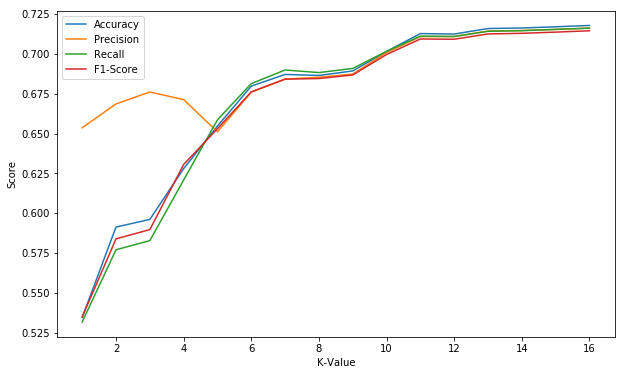

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
ax = ret.plot.line(ax= ax)
ax.set_xlabel("K-Value")
ax.set_ylabel("Score")
# ax.set_title("Number of Features vs. Model Performance")